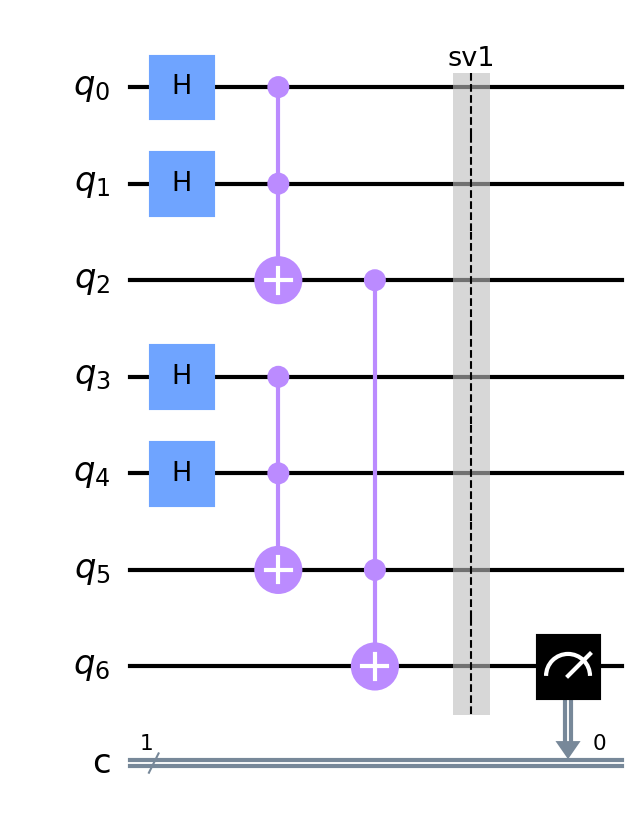

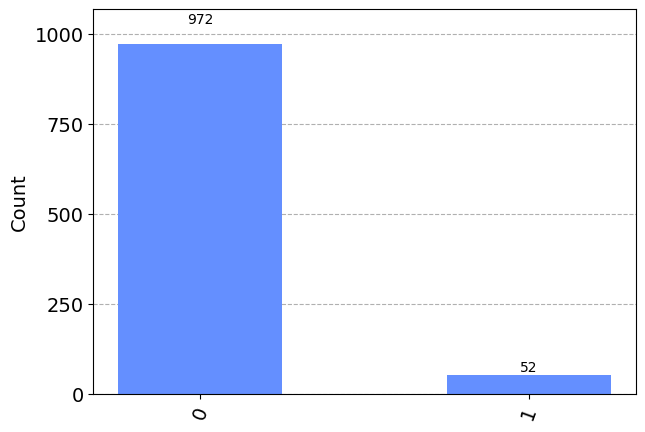

In [5]:
"""quantum_circuit3.ipynb"""

from __future__ import annotations

import typing

import numpy as np
from qis101_utils import as_latex
from qiskit import Aer, QuantumCircuit, execute  # type: ignore
from qiskit.visualization import plot_histogram  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

# Cell 1

backend: Any = Aer.get_backend("statevector_simulator")
qc: Any = QuantumCircuit(7, 1)

# Implementing the circuit

# Applying Hadamard Matrix gate onto q0, q1, q3, q4
qc.h(0)
qc.h(1)
qc.h(3)
qc.h(4)

# Applying the CC-NOT gate onto q2 with q0, q1
qc.ccx(0, 1, 2)
# Applying the CC-NOT gate onto q5 with q3, q4
qc.ccx(3, 4, 5)
# Applying the CC-NOT gate onto q6 with q2, q5
qc.ccx(2, 5, 6)

qc.save_statevector("sv1")

# Measuring q6
qc.measure(6, 0)

# obtaining results
result: Any = execute(qc, backend).result()
counts: Any = result.get_counts()

sv1: Any = result.data(0)["sv1"]

# Need to take 1_024 shots
shots = 1_024 
result: Any = execute(qc, backend, shots=shots).result()
counts: Any = result.get_counts()

# Plotting the histogram and circuit
display(qc.draw(output="mpl", scale=1.5))

display(plot_histogram(counts))  # type: ignore


In [ ]:
# Cell 2

# Explaing the probability of q6 == 1 if there was no quantum noise
""" In order ofr q6 == 1, it needs all other qubits to be == 1 which is improbable. """